In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

from skimage import io

import cv2 as cv
import cv2

import numpy as np

In [3]:
class Shower:
    def show_img(
        img_mtx: np.ndarray, 
        extra_img_params: dict = {}, 
        in_gray: bool=True, 
        is_show: bool=True,
        figsize: tuple=None
    ):
        '''
            cmap='gray': display the image in grayscale
        '''
        
        if in_gray:
            img_params = {'X': img_mtx} | {'cmap':'gray'} | extra_img_params
        else:
            img_params ={'X': img_mtx} | extra_img_params

            
        if figsize is not None:
            plt.figure(figsize=figsize)
        

        plt.imshow(**img_params)
        plt.axis('off')


        if is_show:
            plt.show()


    def show_two_img(
        img_mtx1: np.ndarray, 
        img_mtx2: np.ndarray,
        title_img1: str = None,
        title_img2: str = None,
        extra_img1_params: dict = {},
        extra_img2_params: dict = {},
        figsize: tuple=(8, 12)
    ):
        plt.figure(figsize=figsize)

        plt.subplot(1, 2, 1)
        Shower.show_img(img_mtx1, extra_img1_params, is_show=False)
        if title_img1:
            plt.title(title_img1)

        plt.subplot(1, 2, 2)
        Shower.show_img(img_mtx2, extra_img2_params, is_show=False)
        if title_img2:
            plt.title(title_img2)

        plt.tight_layout() # fit into the figure area without overlapping
        plt.show()

# Theory

In [4]:
def HoughLineTransform(image):
  '''Алогритм Хафа для поиска линий'''
  result = np.zeros(image.shape, dtype=np.uint8)
  resultImage = image.copy()
  edges = cv2.Canny(image, 50, 200, apertureSize=3)
  lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

  print("Грани")
  Shower.show_img(edges)

  for i in range(len(lines[:, 0, 0])):
    for rho, theta in lines[i]:
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rho
      y0 = b*rho
      x1 = int(x0 + 1000*(-b))
      y1 = int(y0 + 1000*(a))
      x2 = int(x0 - 1000*(-b))
      y2 = int(y0 - 1000*(a))
      cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 2)
      cv2.line(resultImage, (x1, y1), (x2, y2), (0, 0, 255), 2)

  return cv.hconcat((result, resultImage))



def HoughCircleTransform(image):
  '''Алогритм Хафа для поиска линий'''
  result = np.zeros(image.shape, dtype=np.uint8)
  resultImage = image.copy()
  imageGray = cv.cvtColor(resultImage, cv.COLOR_RGB2GRAY)
  rows = imageGray.shape[0]
  circles = cv2.HoughCircles(imageGray, cv2.HOUGH_GRADIENT, 1, rows/8)
  #  param1=100,param2=30,
  #  minRadius=1,maxRadius=70)

  if circles is not None:
    circles = np.around(circles).astype('uint16')
    for i in circles[0, :]:
      cv2.circle(result, (i[0], i[1]), i[2], (0, 0, 255), 2)
      cv2.circle(result, (i[0], i[1]), 2, (0, 0, 255), 3)
      cv2.circle(resultImage, (i[0], i[1]), i[2], (0, 0, 255), 2)
      cv2.circle(resultImage, (i[0], i[1]), 2, (0, 0, 255), 3)

  return cv.hconcat((result, resultImage))

Оригнальное изображение


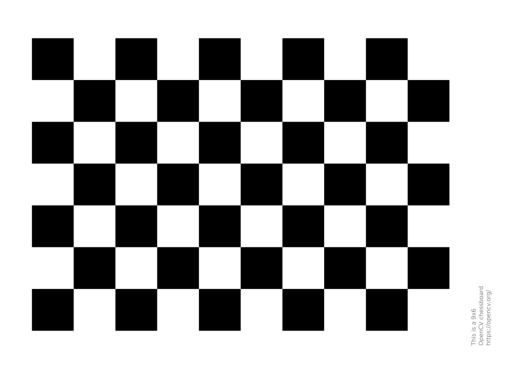

Найденные примитивы
Грани


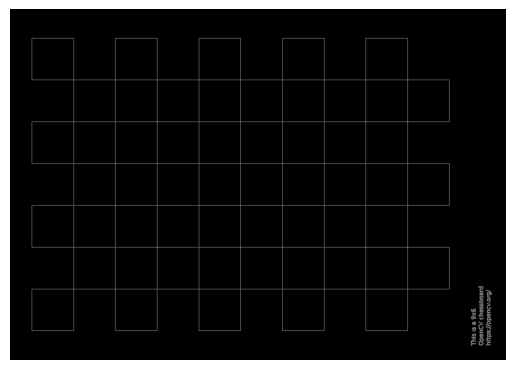

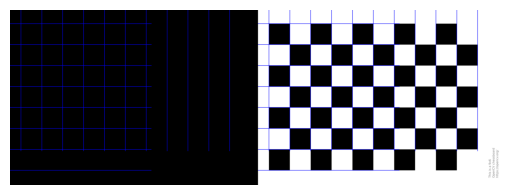

In [5]:
# Начало программы
imageChessUrl = "https://github.com/opencv/opencv/blob/master/samples/data/chessboard.png?raw=true"
baseImageChess = io.imread(imageChessUrl)
imageChess = cv2.cvtColor(baseImageChess, cv.COLOR_BGR2RGB)

# # Вывод изображения
print("Оригнальное изображение")
Shower.show_img(imageChess)
print("Найденные примитивы")
result = HoughLineTransform(imageChess)
Shower.show_img(result)

Оригнальное изображение


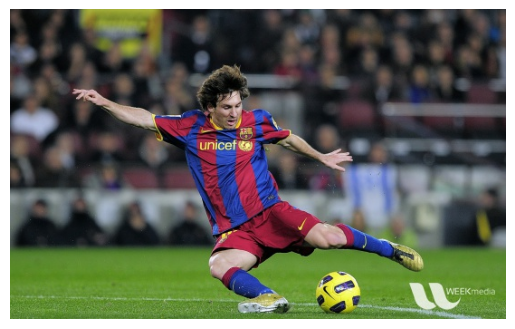

Найденные примитивы


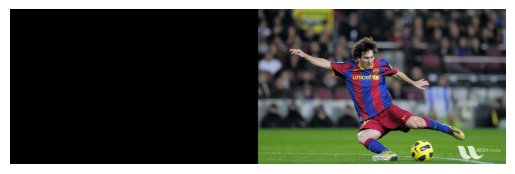

In [6]:
imageMessiUrl = "https://github.com/opencv/opencv/blob/master/samples/data/messi5.jpg?raw=true"
baseImageMessi = io.imread(imageMessiUrl)
imageMessi = cv.cvtColor(baseImageMessi, cv.COLOR_RGBA2RGB)

# Вывод изображения
print("Оригнальное изображение")
Shower.show_img(imageMessi, in_gray=False)
print("Найденные примитивы")
result = HoughCircleTransform(imageMessi)
Shower.show_img(result, in_gray=False)

Найденные примитивы


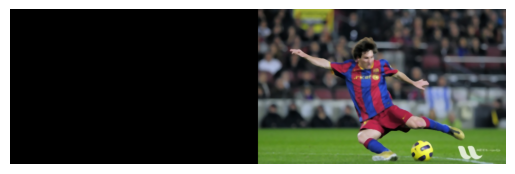

In [7]:
# Размытие
print("Найденные примитивы")
blurImageMessi = cv.medianBlur(imageMessi, 5)
result = HoughCircleTransform(blurImageMessi)
Shower.show_img(result)

Найденные примитивы


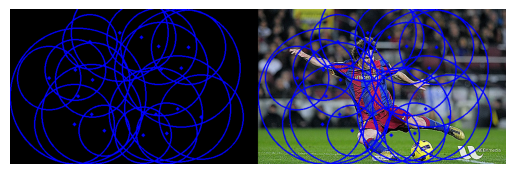

In [8]:
# # Увелечение резкости
print("Найденные примитивы")
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_image = cv2.filter2D(imageMessi, -1, kernel)

result = HoughCircleTransform(sharpened_image)
Shower.show_img(result)

## Поиск объекта по цветам

In [9]:
def CirlceFind(image):
    '''Алогритм Хафа для поиска линий'''
    # Пробуем просто взять красный канал
    # B,G,R = cv.split(image)
    R,G,B = cv.split(image)

    # Отсекаем пиксели, у которых значение меньше 200
    redImage = np.zeros(image.shape)
    redImage[R > 200] = [0, 0, 255]

    print("Изображение с отсеченными цветами R")
    Shower.show_img(redImage, in_gray=False)
    GreenImage = np.zeros(image.shape)
    GreenImage[G > 200] = [0, 255, 0]

    print("Изображение с отсеченными цветами G")
    Shower.show_img(GreenImage, in_gray=False)
    BlueImage = np.zeros(image.shape)
    BlueImage[B > 200] = [255, 0, 0]

    print("Изображение с отсеченными цветами B")
    Shower.show_img(BlueImage, in_gray=False)

    # Отсекаем канал B и R
    rbImage = np.zeros(image.shape)
    rbImage[(B < 70) * (B > 20) * (R > 100)] = [0, 0, 255]

    print("Изображение с отсеченными каналами R и B")
    Shower.show_img(rbImage, in_gray=False)

    # Морфологическая операция закрытия
    kernel = np.ones((5,5),np.uint8)
    closing = cv2.morphologyEx(rbImage, cv2.MORPH_CLOSE, kernel)
    print("Изображение после закрытия")
    Shower.show_img(closing, in_gray=False)

    opening = cv2.morphologyEx(rbImage, cv2.MORPH_OPEN, kernel)
    print("Изображение после открытия")
    Shower.show_img(opening, in_gray=False)

    #можно поменять местами алгоритмы, для лучшего результата
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    print("Изображение после открытия")
    Shower.show_img(opening, in_gray=False)

Оригнальное изображение


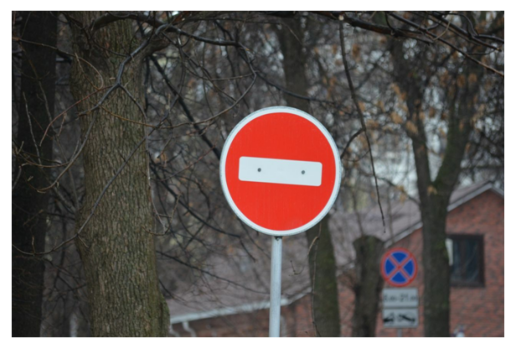

In [10]:
# Начало программы
imageUrl = "https://habrastorage.org/r/w1560/getpro/habr/upload_files/13a/8bb/bb5/13a8bbbb52f60bad2637a2fb6fd3c725.png"
baseImage = io.imread(imageUrl)
image = cv.cvtColor(baseImage, cv.COLOR_RGBA2RGB)

print("Оригнальное изображение")
Shower.show_img(image, in_gray=False)

Красный канал


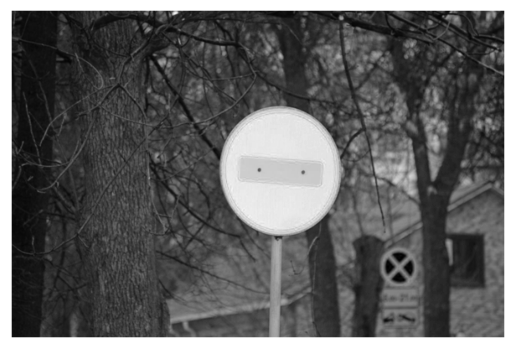

In [11]:
# Пробуем просто взять красный канал
R, G, B = cv.split(image)
print("Красный канал")
Shower.show_img(R)#, in_gray=False)

Изображение с отсеченными цветами


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


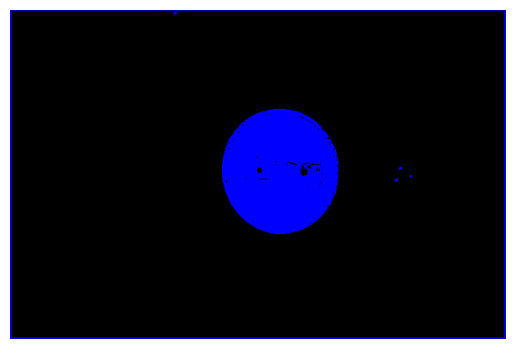

In [12]:
redImage = np.zeros(image.shape)
redImage[R > 200] = [0, 0, 255]
print("Изображение с отсеченными цветами")
Shower.show_img(redImage)#, in_gray=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение с отсеченными цветами R


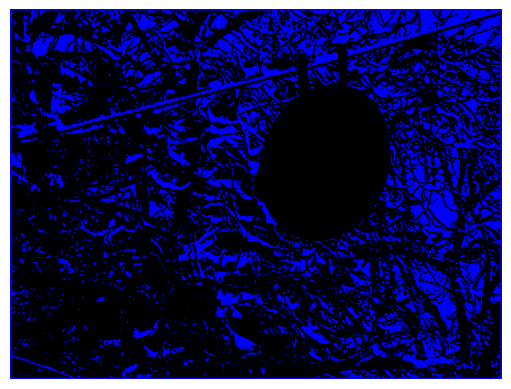

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение с отсеченными цветами G


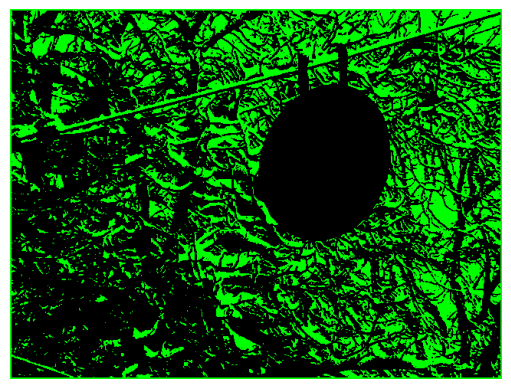

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение с отсеченными цветами B


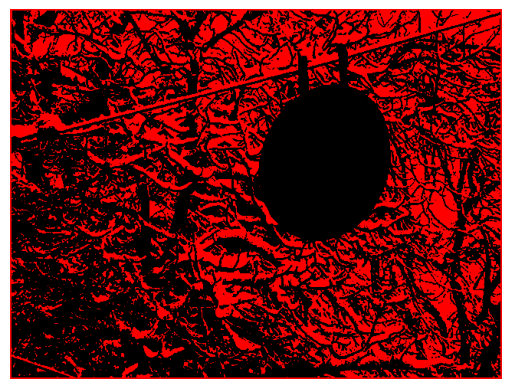

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение с отсеченными каналами R и B


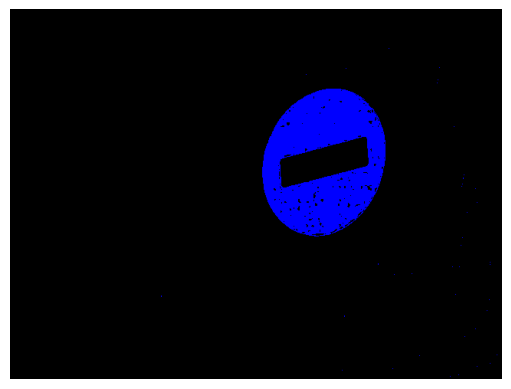

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение после закрытия


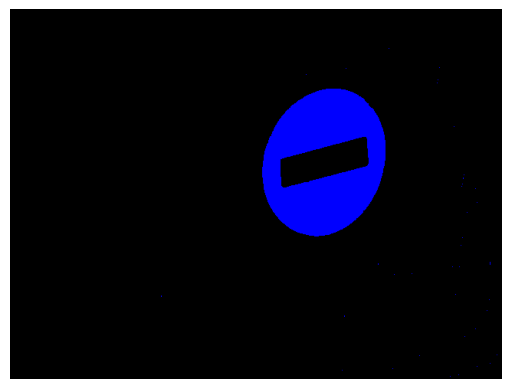

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение после открытия


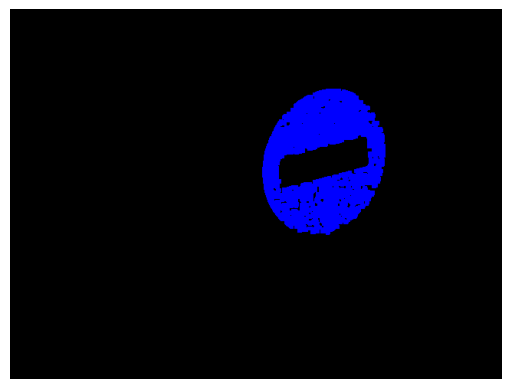

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение после открытия


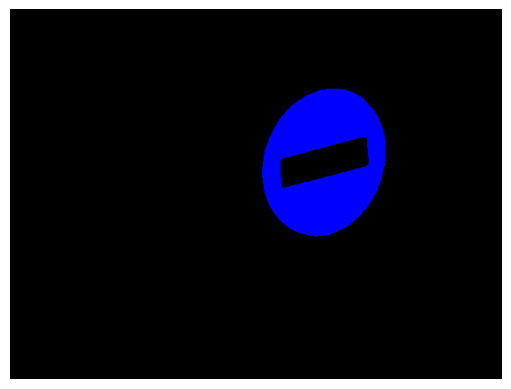

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение с отсеченными цветами R


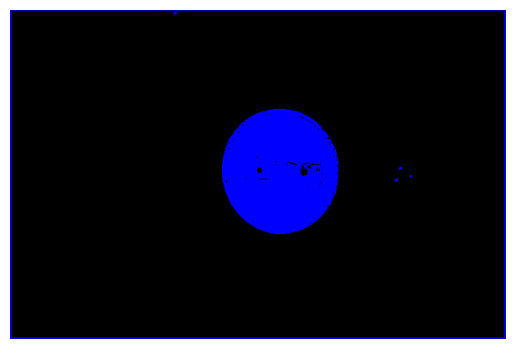

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение с отсеченными цветами G


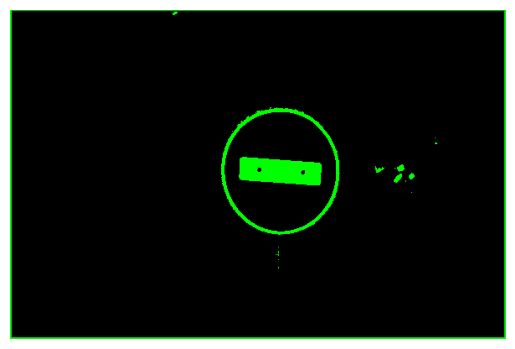

Изображение с отсеченными цветами B


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


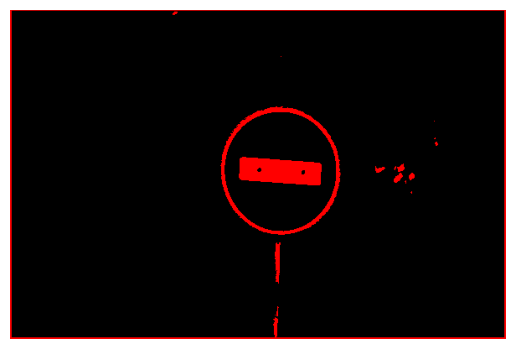

Изображение с отсеченными каналами R и B


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


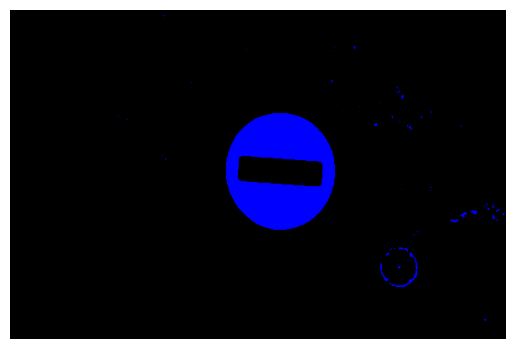

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение после закрытия


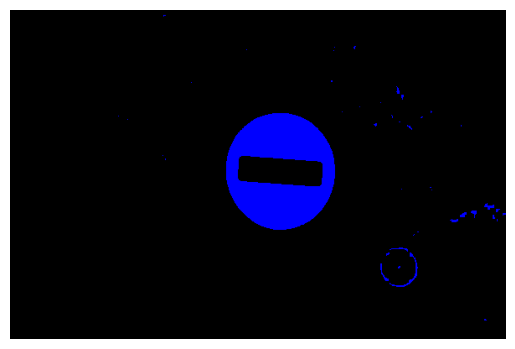

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение после открытия


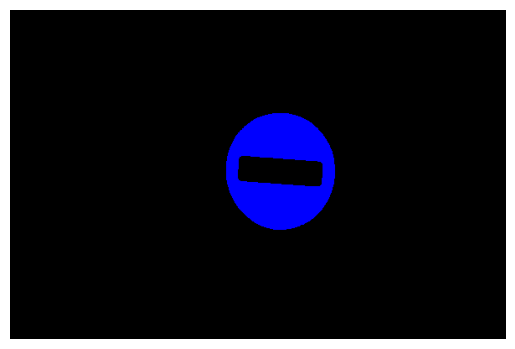

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение после открытия


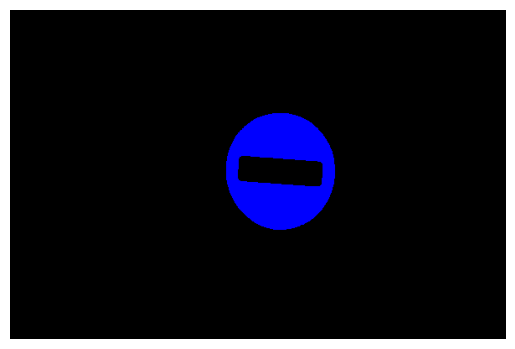

In [13]:
# Проверим наш метод на другом изображении
imageUrl2 = "https://habrastorage.org/r/w1560/getpro/habr/upload_files/cc2/a6a/679/cc2a6a679de23ddb153a686bcde33671.png"
baseImage2 = io.imread(imageUrl2)
image2 = cv.cvtColor(baseImage2, cv.COLOR_RGBA2RGB)

CirlceFind(image2)
CirlceFind(image)

## Поиск объекта методом хафмана

In [14]:
def HoughCircleTransform(
  image,
  param1=300,
  param2=45,
  minRadius=1,
  maxRadius=100
):
  result = np.zeros(image.shape, dtype=np.uint8)
  resultImage = image.copy()
  imageGray = cv.cvtColor(resultImage, cv.COLOR_RGB2GRAY)
  rows = imageGray.shape[0]
  circles = cv2.HoughCircles(imageGray, cv2.HOUGH_GRADIENT, 1, rows/8,
                             param1=param1, param2=param2,
                             minRadius=minRadius, maxRadius=maxRadius)

  if circles is not None:
    circles = np.around(circles).astype('uint16')
    for i in circles[0, :]:
      cv2.circle(result, (i[0], i[1]), i[2], (0, 0, 255), 2)
      cv2.circle(result, (i[0], i[1]), 2, (0, 255, 0), 3)  # рисуем центр
      cv2.circle(resultImage, (i[0], i[1]), i[2], (0, 255, 0), 2)
      cv2.circle(resultImage, (i[0], i[1]), 2, (0, 255, 0), 3)

  return cv.hconcat((result, resultImage))

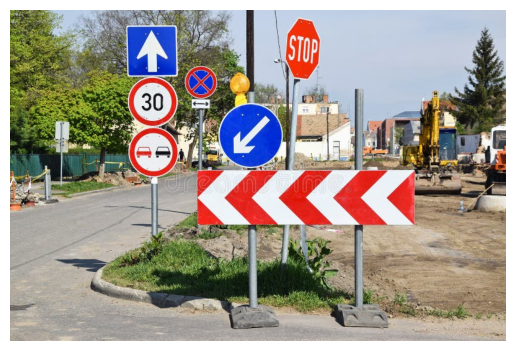

In [15]:
imageUrl = "https://thumbs.dreamstime.com/b/road-signs-road-construction-city-59454043.jpg"
baseImage = io.imread(imageUrl)
image = cv.cvtColor(baseImage, cv.COLOR_RGBA2RGB)

Shower.show_img(image, in_gray=False)

Поиск кругов


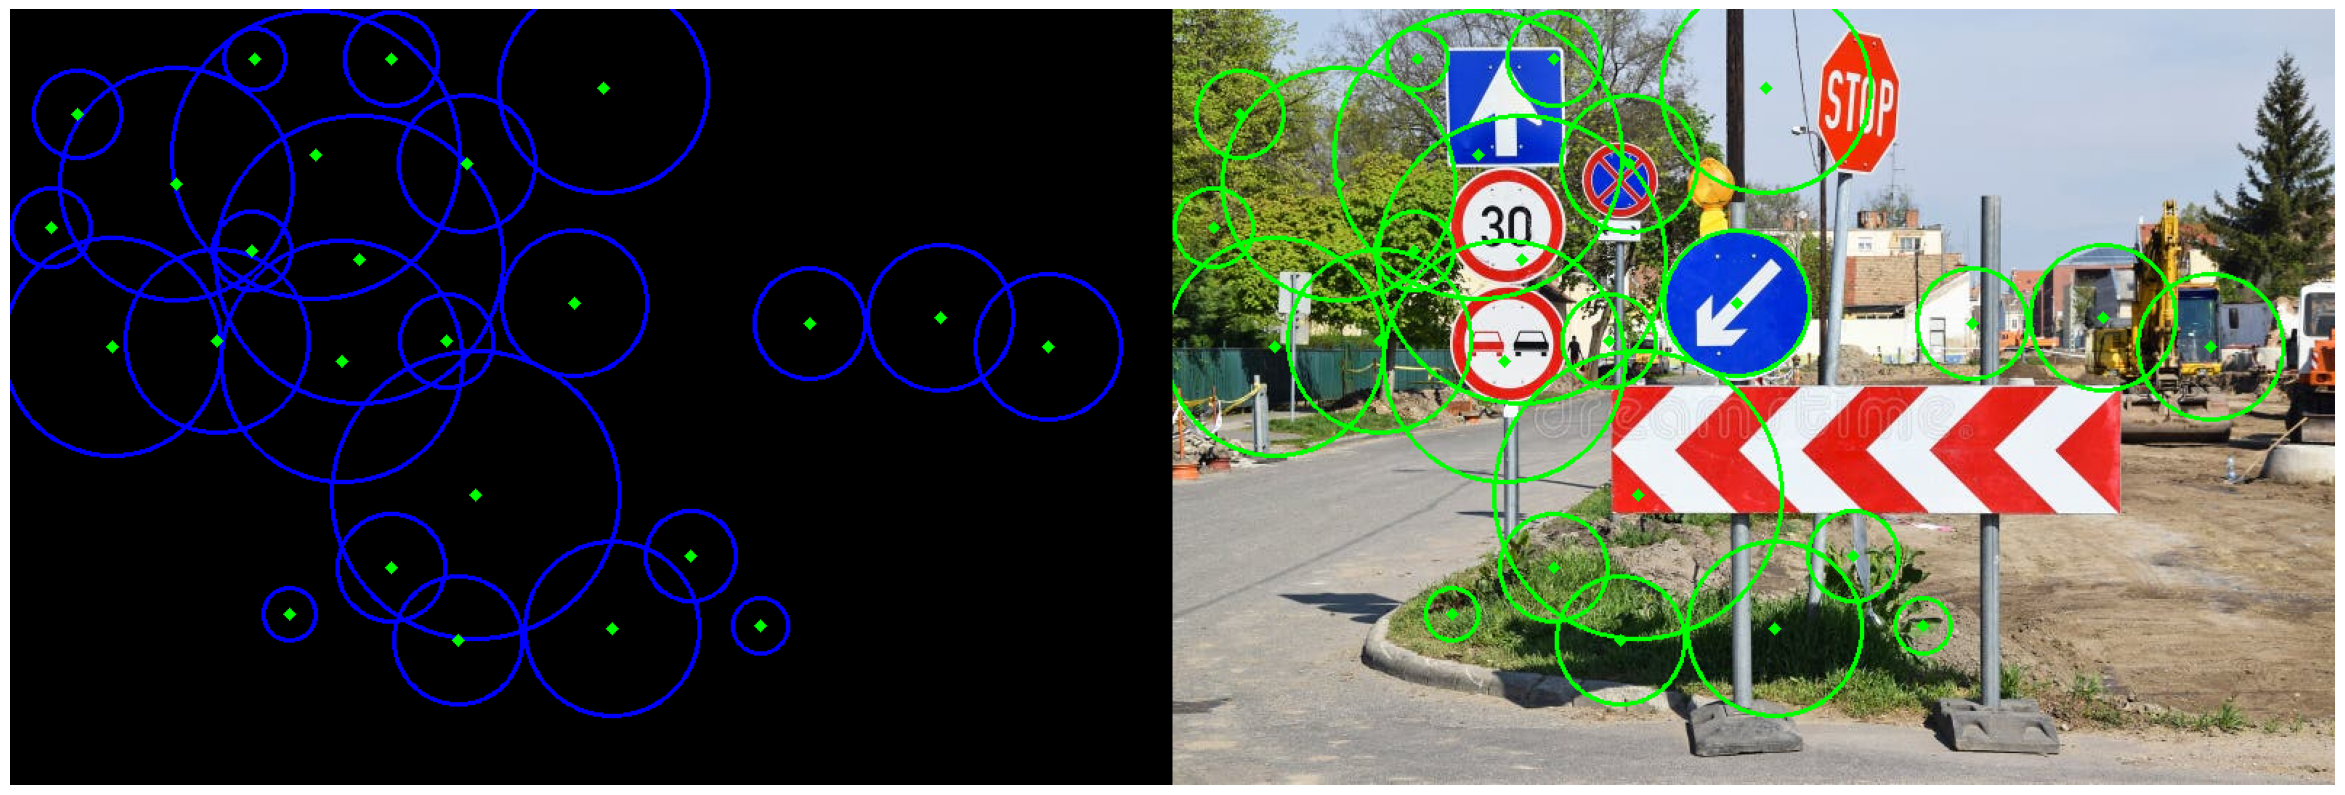

In [16]:
print("Поиск кругов")
result = HoughCircleTransform(image)
Shower.show_img(result, in_gray=False, figsize=(30, 30))

Поиск кругов с фильтром


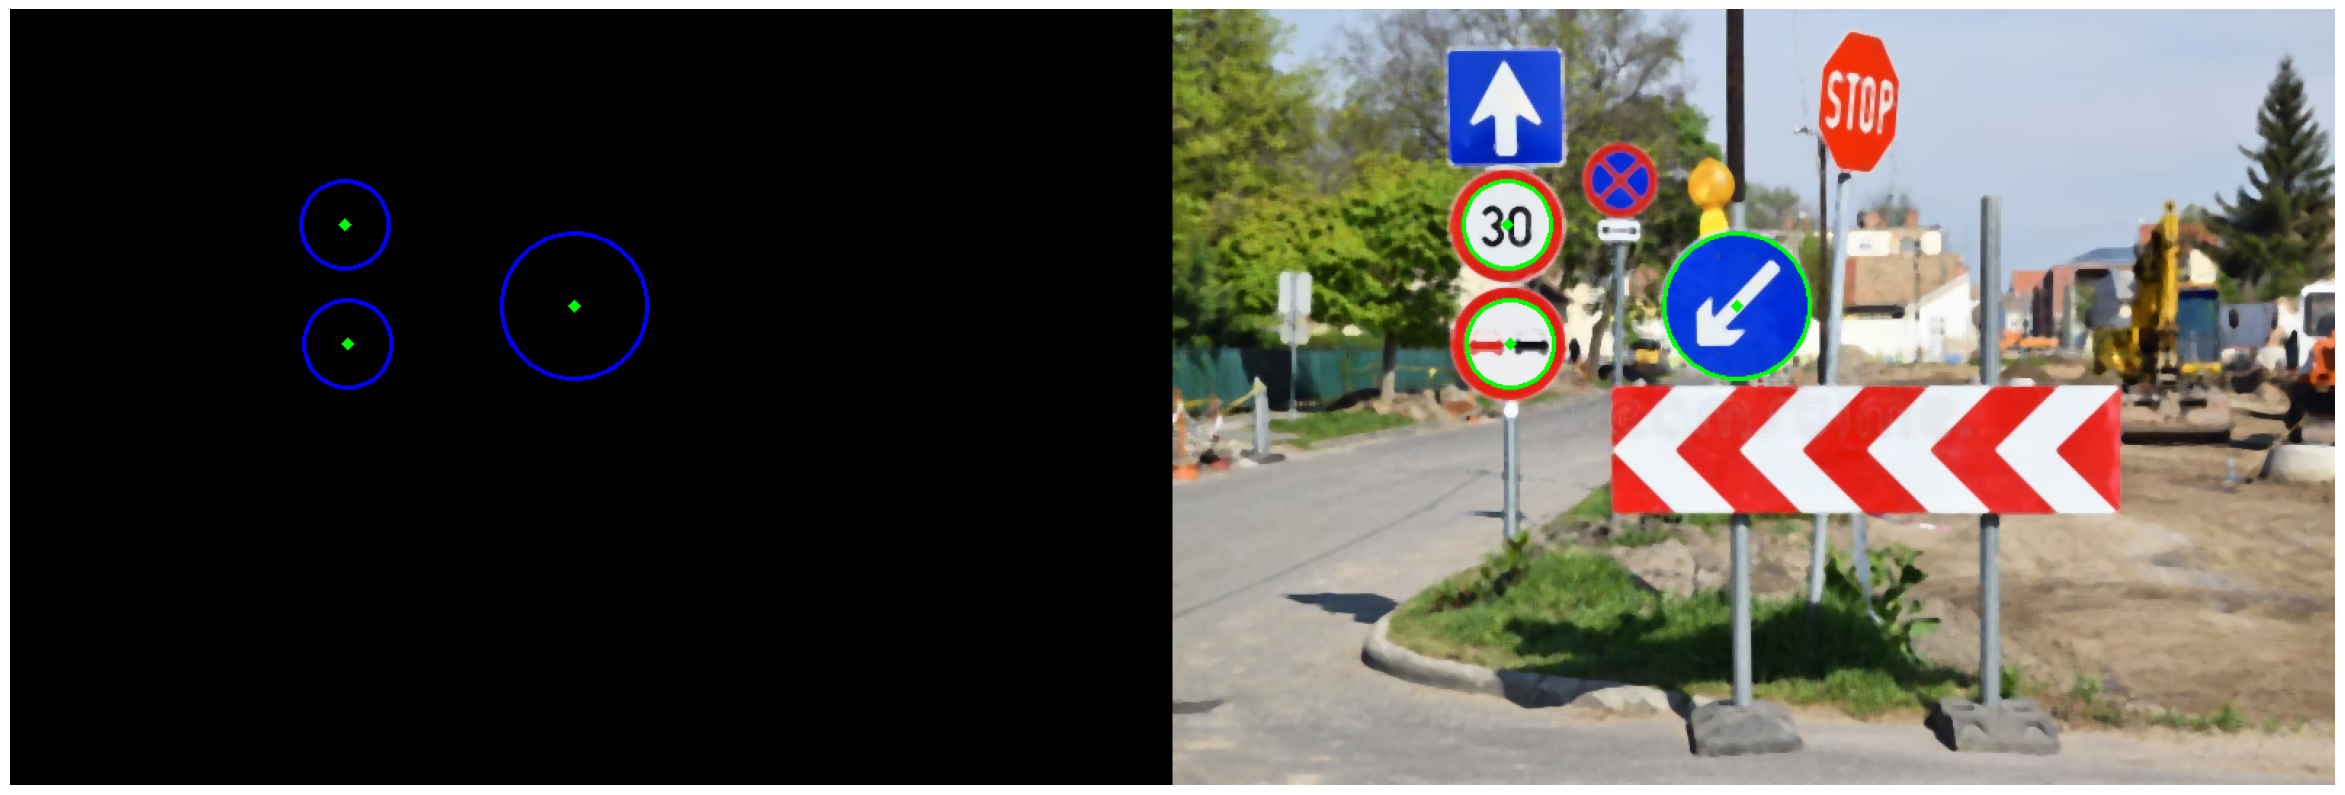

In [17]:
print("Поиск кругов с фильтром")
blurImage = cv.medianBlur(image, 5)
result = HoughCircleTransform(blurImage)
Shower.show_img(result, in_gray=False, figsize=(30, 30))

# Homework

## Task 1

Написать программу
которая выполняет
поиск объекта на
изображении по цвету

In [18]:
def MyCirlceFind(image):
    '''Алогритм Хафа для поиска линий'''
    B,G,R = cv.split(image)

    # Отсекаем пиксели, у которых значение меньше 200
    GreenImage = np.zeros(image.shape)
    GreenImage[G > 200] = [0, 255, 0]
    print("Изображение с отсеченными цветами G")
    Shower.show_img(GreenImage, in_gray=False)

    redImage = np.zeros(image.shape)
    redImage[R > 200] = [0, 0, 255]
    print("Изображение с отсеченными цветами R")
    Shower.show_img(redImage, in_gray=False)

    BlueImage = np.zeros(image.shape)
    BlueImage[B > 200] = [255, 0, 0]
    print("Изображение с отсеченными цветами B")
    Shower.show_img(BlueImage, in_gray=False)

    # Морфологическая операция закрытия
    kernel = np.ones((5,5),np.uint8)
    closing = cv2.morphologyEx(GreenImage, cv2.MORPH_CLOSE, kernel)
    print("Изображение после закрытия")
    Shower.show_img(closing, in_gray=False)

    opening = cv2.morphologyEx(GreenImage, cv2.MORPH_OPEN, kernel)
    print("Изображение после открытия")
    Shower.show_img(opening, in_gray=False)

In [19]:
PICTURE1_PATH = 'materials/imgs/green_circles.webp'
PICTURE2_PATH = 'materials/imgs/green_circles2.png'

Оригнальное изображение


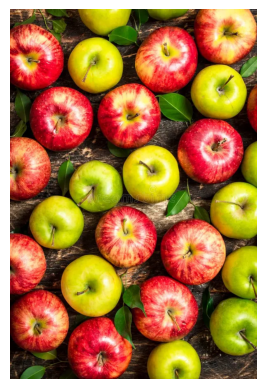

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение с отсеченными цветами G


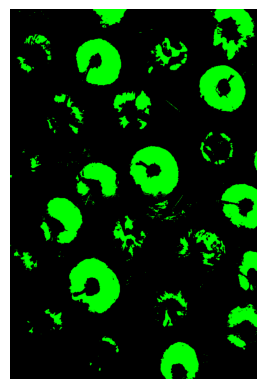

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение с отсеченными цветами R


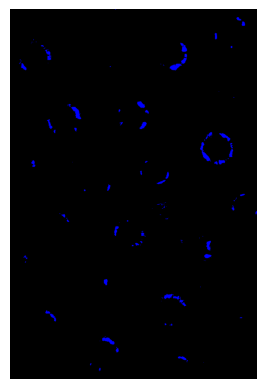

Изображение с отсеченными цветами B


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


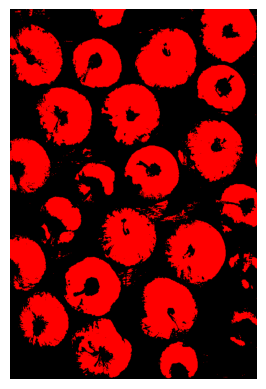

Изображение после закрытия


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


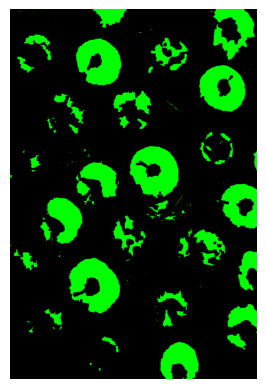

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение после открытия


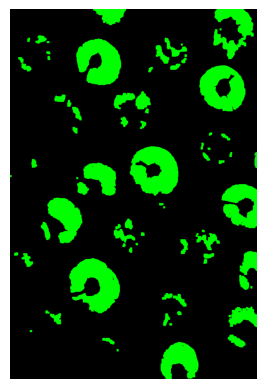

In [20]:
image = cv2.cvtColor(cv2.imread(PICTURE1_PATH), cv2.COLOR_BGR2RGB)

print("Оригнальное изображение")
Shower.show_img(image, in_gray=False)

MyCirlceFind(image)

Оригнальное изображение


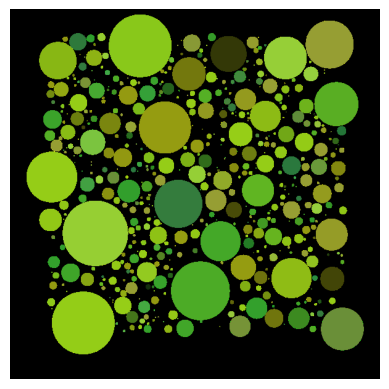

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение с отсеченными цветами G


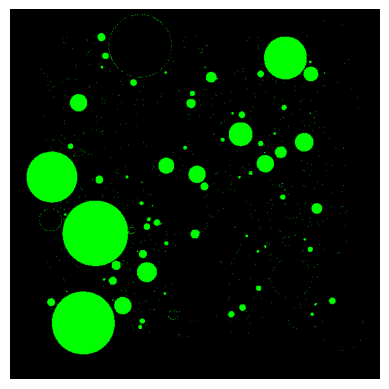

Изображение с отсеченными цветами R


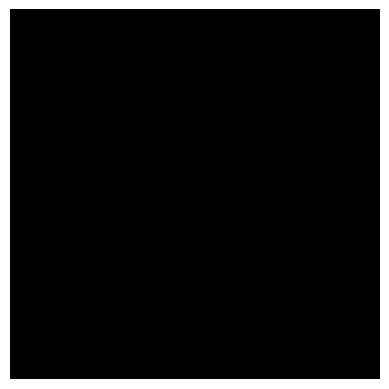

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение с отсеченными цветами B


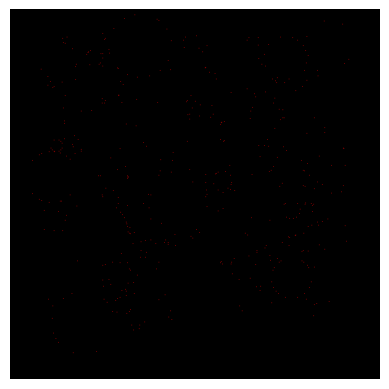

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение после закрытия


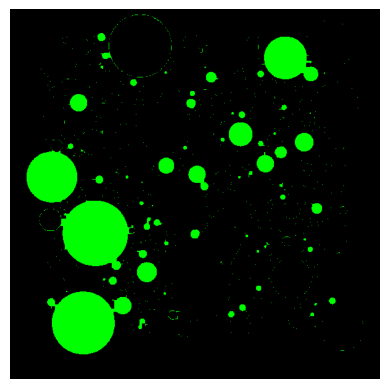

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Изображение после открытия


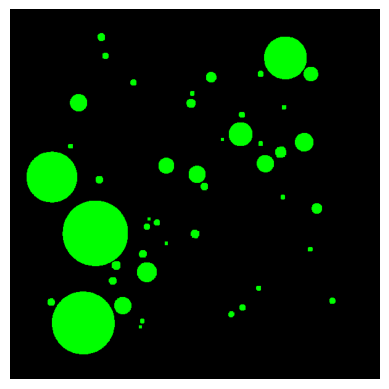

In [21]:
image = cv2.cvtColor(cv2.imread(PICTURE2_PATH), cv2.COLOR_BGR2RGB)

print("Оригнальное изображение")
Shower.show_img(image, in_gray=False)

MyCirlceFind(image)

## Task 2

Написать программу
которая выполняет
поиск круга на
изображении через
преобразование Хафа

Оригнальное изображение


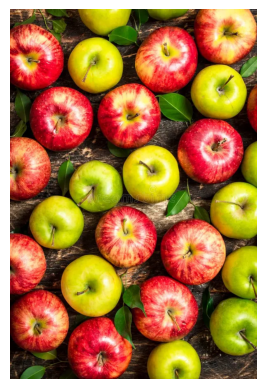

In [22]:
image = cv2.cvtColor(cv2.imread(PICTURE1_PATH), cv2.COLOR_BGR2RGB)

print("Оригнальное изображение")
Shower.show_img(image, in_gray=False)

In [23]:
param1 = 100
param2 = 20
minRadius = 2
maxRadius = 80

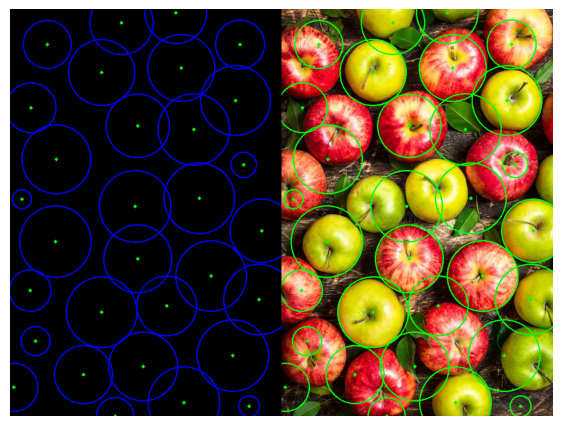

In [24]:
transform = HoughCircleTransform(
    image,
    param1=param1,
    param2=param2,
    minRadius=minRadius,
    maxRadius=maxRadius
)

Shower.show_img(transform, in_gray=False, figsize=(7, 12))

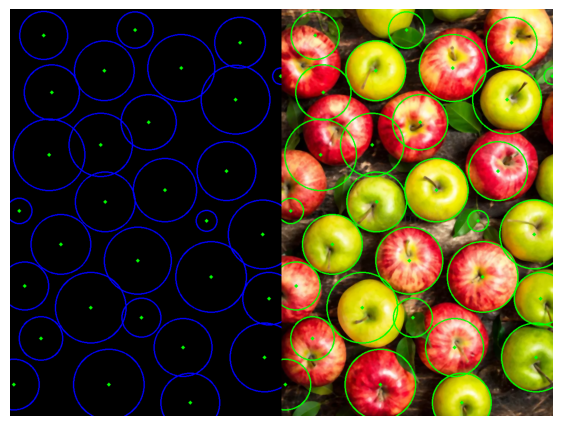

In [25]:
blurImage = cv.medianBlur(image, 5)
transform = HoughCircleTransform(
    blurImage,
    param1=param1,
    param2=param2,
    minRadius=minRadius,
    maxRadius=maxRadius
)

Shower.show_img(transform, in_gray=False, figsize=(7, 12))